# Unit 5 - Financial Planning

In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
BTC_Data = requests.get(btc_url).json()
BTC_Data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19280025,
   'total_supply': 19280025,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 23596.0,
     'volume_24h': 43422601904,
     'market_cap': 454672793502,
     'percentage_change_1h': -0.154322588645213,
     'percentage_change_24h': -2.16880361323077,
     'percentage_change_7d': 2.48072669925574,
     'percent_change_1h': -0.154322588645213,
     'percent_change_24h': -2.16880361323077,
     'percent_change_7d': 2.48072669925574}},
   'last_updated': 1675386273}},
 'metadata': {'timestamp': 1675386273,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# Fetch current BTC price
BTC_Data = requests.get(btc_url).json()
BTC_Price = BTC_Data.get('data',).get('1').get('quotes').get('USD').get('price')
print(BTC_Price)



23596.0


In [7]:
# Fetch current ETH price
ETH_Data = requests.get(eth_url).json()
ETH_Data
ETH_Price = ETH_Data.get('data',).get('1027').get('quotes').get('USD').get('price')
print(ETH_Price)

1649.05


In [8]:
# Compute current value of my crypto
ETH_Val = my_eth * ETH_Price
ETH_Val
BTC_Val = my_btc * BTC_Price
BTC_Val
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${BTC_Val:0.2f}")
print(f"The current value of your {my_eth} ETH is ${ETH_Val:0.2f}")

The current value of your 1.2 BTC is $28315.20
The current value of your 5.3 ETH is $8739.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format

# I tried this way of formatting the date but it came out weird trying option 2 below
# today = date.fromisoformat('2023-01-31')
today = pd.Timestamp("2023-01-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
Inv_Portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = Inv_Portfolio[Inv_Portfolio['symbol'] == 'AGG'].drop('symbol',axis =1)
SPY = Inv_Portfolio[Inv_Portfolio['symbol'] == 'SPY'].drop('symbol',axis =1)


# Concatenate the ticker DataFrames
CombinedInvPortfolio = pd.concat([AGG, SPY],axis=1, keys=['Bonds','SP500'])

# Preview DataFrame
CombinedInvPortfolio

Bonds                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-01-31 05:00:00+00:00  100.16  100.34  99.825  100.22  12083602   

                                                    SP500                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2023-01-31 05:00:00+00:00       31978  100.037055  401.13  406.53  400.77   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-01-31 05:00:00+00:00  406.48  86836885      513130  404.159126

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(CombinedInvPortfolio["Bonds"]["close"])
spy_close_price = float(CombinedInvPortfolio["SP500"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.22
Current SPY closing price: $406.48


In [13]:
# Compute the current value of shares
Agg_value = agg_close_price * my_agg
SPY_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${Agg_value:0.2f}")

The current value of your 50 SPY shares is $20324.00
The current value of your 200 AGG shares is $20044.00


### Savings Health Analysis

In [14]:
# Set monthly household income
Monthly_Income = 12000
StockMarket = SPY_value + Agg_value
Crypto = BTC_Val + ETH_Val

print(f"Total Stock & Bond Market Value ${StockMarket:0.2f}")
print(f"Total Cryptocurrency Market Value ${Crypto:0.2f}")
# Consolidate financial assets data
Personal_Assets = {'Crypto Assets':[BTC_Val,ETH_Val],'Stock Market Assets':[SPY_value, Agg_value]}
Personal_Assets_df = pd.DataFrame(data = Personal_Assets)
# Create savings DataFrame
Asset_Data ={"Value":[StockMarket,Crypto]}
Names = ['Stock Market Assets','Crypto Assets']
Personal_Assets_df2 = pd.DataFrame(Asset_Data, index = Names)
# Display savings DataFrame
display(Personal_Assets_df)
display(Personal_Assets_df2)

Total Stock & Bond Market Value $40368.00
Total Cryptocurrency Market Value $37055.17


,Crypto Assets,Stock Market Assets
0,28315.200,20324.0
1,8739.965,20044.0


,Value
Stock Market Assets,40368.000
Crypto Assets,37055.165


array([<AxesSubplot:ylabel='Value'>], dtype=object)

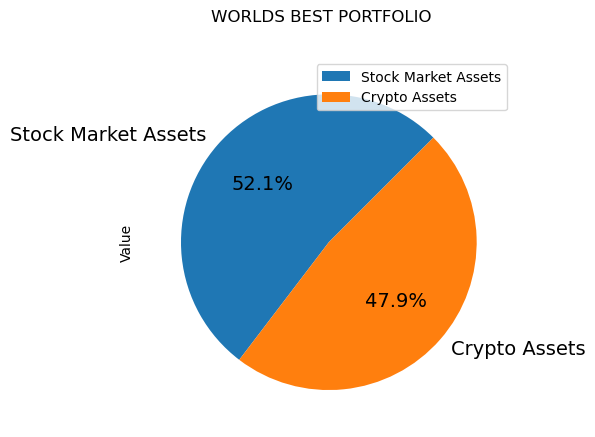

In [15]:
# Plot savings pie chart

Personal_Assets_df2.plot.pie( subplots=True ,autopct='%1.1f%%', 
 startangle=45, shadow=False, labels= Names, legend = True, fontsize=14,rotatelabels=False,title = 'WORLDS BEST PORTFOLIO')

In [16]:
# Set ideal emergency fund
emergency_fund = Monthly_Income * 3
print(emergency_fund)

# Calculate total amount of savings
ALL_SAVINGS = Crypto + StockMarket
print(ALL_SAVINGS)
# Validate saving health
if ALL_SAVINGS > emergency_fund:
    print(f'Relax, you have enough money to buy the moon, if the moon only costs ${ALL_SAVINGS:0.2f}')
elif ALL_SAVINGS == emergency_fund:
    print(f'Might want to top up the coffers you have just enough to cover yourself')
else:
    print(f'RIP you need at least ${emergency_fund:0.2f - ALL_SAVINGS:0.2f} to make it')
        

36000
77423.16500000001
Relax, you have enough money to buy the moon, if the moon only costs $77423.17


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-02-01', tz='America/New_York').isoformat()

In [32]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]
Tickers_Df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY_Data = Tickers_Df[Tickers_Df["symbol"]=="SPY"].drop("symbol", axis=1)

AGG_Data = Tickers_Df[Tickers_Df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
Ticker_Final = pd.concat([SPY_Data,AGG_Data],axis =1 ,keys = ("SPY","AGG"))

# Display sample data
Ticker_Final.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2018-02-01 05:00:00+00:00  281.08  283.06  280.68  281.68   90622947   
2018-02-02 05:00:00+00:00  280.08  280.23  275.41  275.51  175825647   
2018-02-05 05:00:00+00:00  273.45  275.85  263.31  264.11  298863447   
2018-02-06 05:00:00+00:00  259.94  269.70  258.70  269.06  354839027   
2018-02-07 05:00:00+00:00  268.50  272.36  267.58  267.67  169270734   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2018-02-01 05:00:00+00:00      304909  281.766220  107.75  107.8250  107.48   
2018-02-02 05:00:00+00:00      548623  277.434737  107.25  107.3450  107.10   
2018-02-05 05:00:00+00:00     1178563  269.869953  107.13  107.8100  107.00   
2018-02-06 05:00:00+00:00     1527398  264.957106  107.46  107.5600  107.28   
2018-02-07 05:00:00+00:00      741997  269.593175  107.43  107.4369  107.00   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-02-01 05:00:00+00:00  107.52  10330443       26477  107.695566  
2018-02-02 05:00:00+00:00  107.20   4779312       17781  107.197964  
2018-02-05 05:00:00+00:00  107.63   5991756       26360  107.347994  
2018-02-06 05:00:00+00:00  107.32   6031378       24296  107.432203  
2018-02-07 05:00:00+00:00  107.08   4115631       17410  107.186511

In [33]:
SPY_Data.head()


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-02-01 05:00:00+00:00,281.08,283.06,280.68,281.68,90622947,304909,281.766220
2018-02-02 05:00:00+00:00,280.08,280.23,275.41,275.51,175825647,548623,277.434737
2018-02-05 05:00:00+00:00,273.45,275.85,263.31,264.11,298863447,1178563,269.869953
2018-02-06 05:00:00+00:00,259.94,269.70,258.70,269.06,354839027,1527398,264.957106
2018-02-07 05:00:00+00:00,268.50,272.36,267.58,267.67,169270734,741997,269.593175


In [34]:
AGG_Data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-02-01 05:00:00+00:00,107.75,107.8250,107.48,107.52,10330443,26477,107.695566
2018-02-02 05:00:00+00:00,107.25,107.3450,107.10,107.20,4779312,17781,107.197964
2018-02-05 05:00:00+00:00,107.13,107.8100,107.00,107.63,5991756,26360,107.347994
2018-02-06 05:00:00+00:00,107.46,107.5600,107.28,107.32,6031378,24296,107.432203
2018-02-07 05:00:00+00:00,107.43,107.4369,107.00,107.08,4115631,17410,107.186511


In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_Portfolio = MCSimulation(
    portfolio_data = Ticker_Final,
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [39]:
# Printing the simulation input data
MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\Desktop\FinTech_Documents\Module5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985553,1.020658,1.003607,0.999303,1.008089,0.998901,1.005307,0.997189,0.996525,1.000897,...,1.008249,0.984532,1.009788,1.000691,0.989828,0.999265,0.996034,0.999000,1.003390,1.001900
2,0.978317,1.027360,1.005475,0.989049,0.999218,1.004668,1.011839,0.998198,1.003716,0.988385,...,1.012562,0.979917,1.013926,1.008243,0.995778,1.005197,0.994896,0.999618,1.007987,1.000434
3,0.979749,1.009116,1.004980,0.994956,0.990943,1.017412,1.005021,1.001428,1.009405,0.984383,...,1.012172,0.982614,1.009926,1.030518,0.996187,1.017426,1.001047,1.000079,1.010444,1.001726
4,0.980209,0.999685,1.017667,1.002883,0.993527,1.010155,1.000933,0.992080,1.002750,0.985429,...,1.009022,0.985391,1.009864,1.039656,0.989224,1.021049,1.008349,1.000330,1.014287,1.005476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.314539,3.617221,3.637276,2.173482,1.029551,1.989377,2.581732,3.742854,3.119192,2.382608,...,3.014587,7.407971,7.582953,5.776323,2.835548,2.116095,4.317087,2.042295,3.190217,9.671736
7557,2.300830,3.627070,3.646806,2.177200,1.036885,2.008445,2.592491,3.749832,3.122414,2.393353,...,3.041722,7.336199,7.649958,5.808086,2.841675,2.103529,4.355913,2.044226,3.193983,9.639220
7558,2.323656,3.650267,3.656491,2.171216,1.029521,2.016852,2.601253,3.728202,3.155001,2.389903,...,3.022451,7.385664,7.632137,5.800993,2.839574,2.107801,4.347931,2.060000,3.201294,9.722221
7559,2.340228,3.685722,3.596395,2.160122,1.037713,2.028820,2.606072,3.696661,3.143362,2.390392,...,3.045943,7.369763,7.595002,5.786866,2.823198,2.092446,4.356425,2.067011,3.195485,9.840245


In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# CHECK 05 simulation of stock price traj!!!

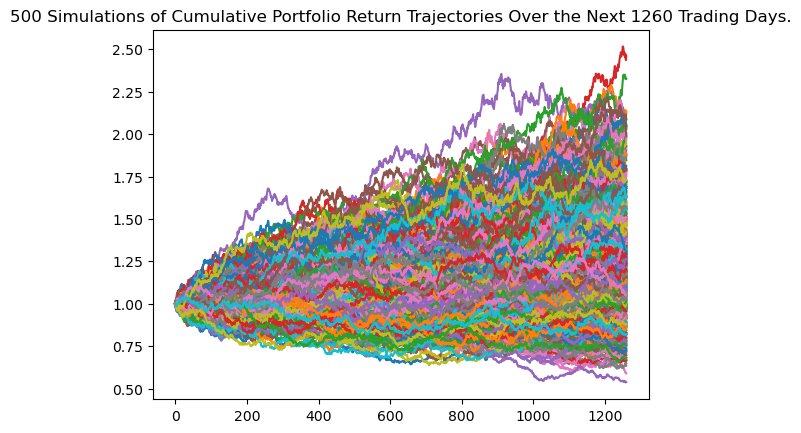

In [57]:
# Plot simulation outcomes
MonteCarlo_Plot = MC_Portfolio.plot_simulation()

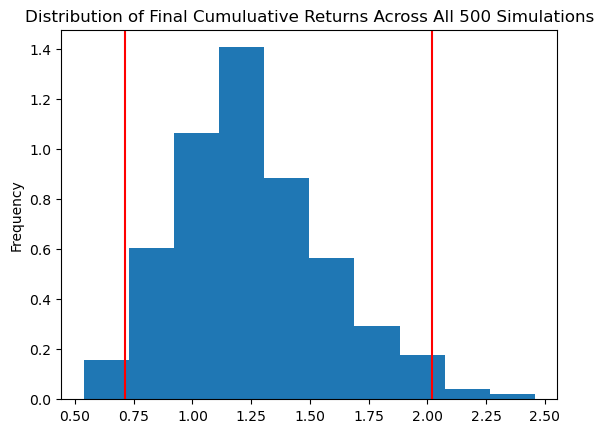

In [58]:
# Plot probability distribution and confidence intervals
Prob_Dist_Plot = MC_Portfolio.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
SummaryStats = MC_Portfolio.summarize_cumulative_return()

# Print summary statistics
print(SummaryStats)

count           500.000000
mean              3.632486
std               2.335797
min               0.482418
25%               2.051632
50%               3.121372
75%               4.420622
max              16.020272
95% CI Lower      0.956659
95% CI Upper      9.383591
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(SummaryStats[8]*initial_investment,2)
ci_upper = round(SummaryStats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19133.18 and $187671.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(SummaryStats[8]*initial_investment2,2)
ci_upper2 = round(SummaryStats[9]*initial_investment2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28699.77 and $281507.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_Portfolio_5 = MCSimulation(
    portfolio_data = Ticker_Final,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\Desktop\FinTech_Documents\Module5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993374,0.995332,1.022933,1.003414,0.997378,1.006268,1.005701,1.000294,0.990734,1.006269,...,0.998950,0.993768,1.011634,1.006705,0.999543,0.995423,0.994564,0.992257,0.994385,1.001660
2,0.988139,0.992454,1.020039,1.007091,0.993424,1.014658,1.005824,0.999381,0.998135,1.016397,...,1.002141,1.001848,0.998823,1.016556,0.997691,0.996230,1.000858,1.002060,0.995637,1.002083
3,0.977153,0.995558,1.032093,1.001412,0.995028,1.007853,1.013615,0.993406,0.990929,1.033443,...,0.995298,1.005463,1.008111,1.014098,0.995121,0.995129,1.014285,1.009358,0.996104,0.985807
4,0.976752,1.006072,1.033841,0.995066,0.981535,1.019104,1.030150,0.990184,0.985046,1.027535,...,0.991751,1.004135,1.019564,1.012783,0.998712,0.987019,1.027726,1.014637,0.998733,0.985513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.892933,1.064287,2.088487,1.053399,0.898113,1.213581,1.191942,1.108714,1.456787,0.968109,...,1.782892,0.841231,0.681023,1.192698,1.242536,1.804869,1.052699,1.022680,1.720417,0.819268
1257,0.889411,1.063075,2.087656,1.046877,0.899105,1.217944,1.201372,1.104831,1.464538,0.978049,...,1.794178,0.842582,0.677324,1.193082,1.259754,1.801612,1.051521,1.025569,1.735622,0.818776
1258,0.890049,1.063059,2.071300,1.052365,0.900238,1.219813,1.206579,1.109607,1.468561,0.979715,...,1.782942,0.846184,0.674996,1.198586,1.264420,1.801312,1.053096,1.028481,1.727812,0.813514
1259,0.889221,1.067272,2.090090,1.051221,0.902284,1.217075,1.187307,1.117114,1.480847,0.976073,...,1.789484,0.856005,0.678204,1.204836,1.264470,1.787316,1.053415,1.037534,1.730674,0.822285


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\Desktop\FinTech_Documents\Module5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

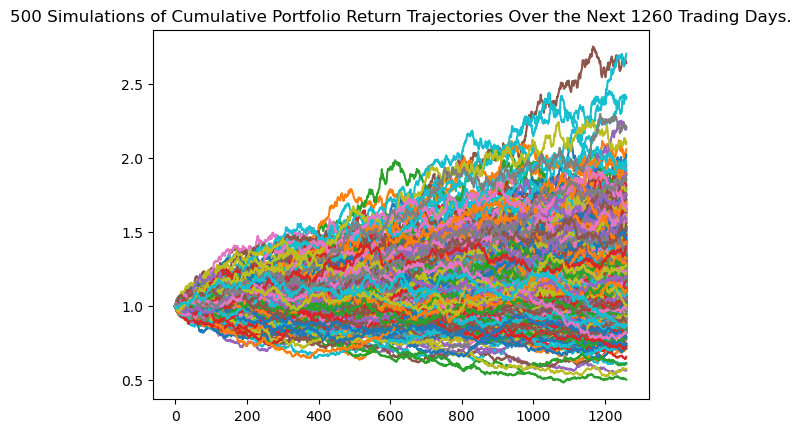

In [53]:
# Plot simulation outcomes
MonteCarlo5_Plot = MC_Portfolio_5.plot_simulation()

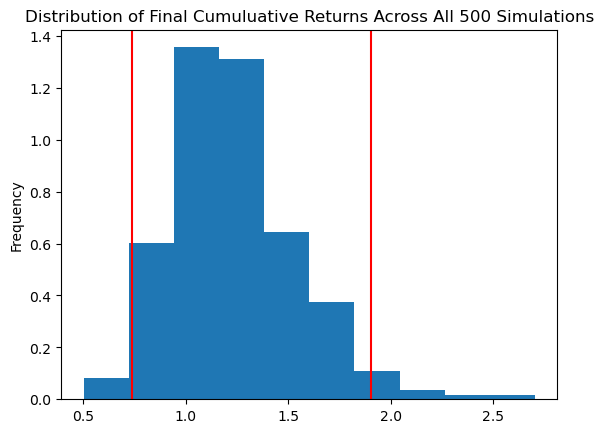

In [54]:
# Plot probability distribution and confidence intervals
Prob_Dist_Plot_5 = MC_Portfolio_5.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
SummaryStats5 = MC_Portfolio_5.summarize_cumulative_return()

# Print summary statistics
print(SummaryStats5)

count           500.000000
mean              1.237514
std               0.309219
min               0.504180
25%               1.028082
50%               1.196768
75%               1.397026
max               2.701556
95% CI Lower      0.737754
95% CI Upper      1.904074
Name: 1260, dtype: float64


In [60]:
# Set initial investment
BIG_initial_investment = 1000000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower5 = round(SummaryStats5[8]*BIG_initial_investment,2)
ci_upper5 = round(SummaryStats5[9]*BIG_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${BIG_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower5} and ${ci_upper5}")

There is a 95% chance that an initial investment of $1000000 in the portfolio over the next 5 years will end within in the range of $737754.48 and $1904073.59


### Ten Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_Portfolio_10 = MCSimulation(
    portfolio_data = Ticker_Final,
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)


In [67]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Portfolio_10.calc_cumulative_return()
# multiply 252 by number of years!!!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\Desktop\FinTech_Documents\Module5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999755,0.995633,1.001431,1.001607,1.002318,1.000204,1.000861,1.013804,1.004917,1.013103,...,0.994127,0.999099,1.002938,0.995993,0.988446,0.995915,0.996289,0.999451,1.001444,1.009541
2,1.000504,0.991255,1.001038,0.997329,0.999893,1.001972,0.998216,1.009923,1.009799,1.005537,...,0.979089,1.000220,1.011252,0.994856,1.000011,0.993305,0.981073,0.988801,1.001006,1.016318
3,1.003880,0.991470,0.996836,0.995946,0.986957,1.001423,1.010138,1.004245,1.010304,1.011296,...,0.973898,1.000699,1.012344,0.989859,0.997314,1.000285,0.982342,0.997853,0.997547,1.024430
4,1.008152,0.985416,0.997125,1.007301,0.982760,1.006618,1.008717,1.004419,1.013248,1.018986,...,0.980520,1.004237,1.010326,0.996845,1.004425,1.002174,0.985253,0.989542,0.984149,1.019157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.847122,1.176070,1.429919,1.080476,0.964854,2.397952,2.054854,1.597802,1.503570,1.660874,...,1.793300,1.336633,1.103901,1.273476,1.100431,1.444338,1.073818,1.023833,1.996885,1.281658
2517,1.873836,1.167235,1.438232,1.080116,0.966153,2.406122,2.046571,1.601506,1.497719,1.666140,...,1.792154,1.352584,1.089246,1.283158,1.104962,1.439903,1.074806,1.013322,1.985004,1.270557
2518,1.863931,1.158097,1.442885,1.081229,0.975402,2.387131,2.052715,1.618356,1.489540,1.682853,...,1.796470,1.361989,1.087427,1.273156,1.095010,1.446308,1.088058,1.019345,1.984024,1.277692
2519,1.865155,1.151617,1.434628,1.090836,0.978086,2.399130,2.041236,1.626208,1.470650,1.679784,...,1.793334,1.364400,1.094355,1.281831,1.094933,1.430456,1.103137,1.029060,1.963675,1.280564


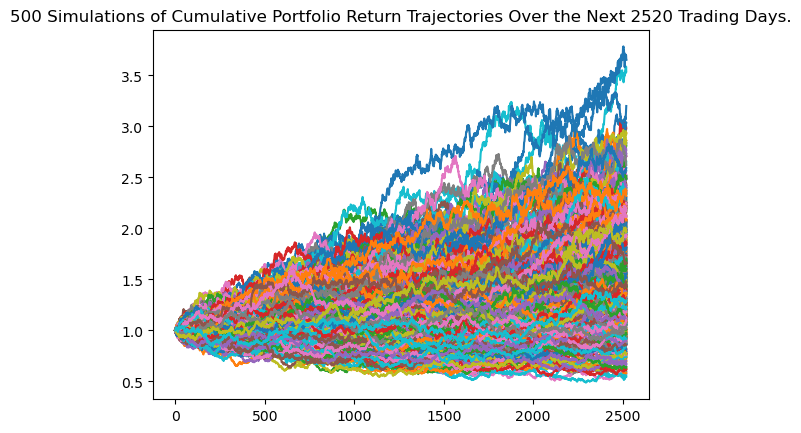

In [68]:
# Plot simulation outcomes
MonteCarlo10_Plot = MC_Portfolio_10.plot_simulation()

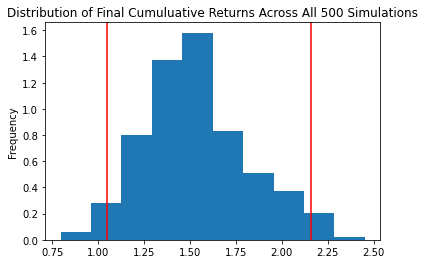

In [33]:
# Plot probability distribution and confidence intervals
Prob_Dist_Plot_5 = MC_Portfolio_5.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
SummaryStats10 = MC_Portfolio_10.summarize_cumulative_return()


# Print summary statistics
print(SummaryStats10)

count           500.000000
mean              1.531172
std               0.536060
min               0.545164
25%               1.138113
50%               1.452501
75%               1.864250
max               3.658099
95% CI Lower      0.699470
95% CI Upper      2.752034
Name: 2520, dtype: float64


In [70]:
# Set initial investment
small_investment = 1000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower10 = round(SummaryStats10[8]*small_investment,2)
ci_upper10 = round(SummaryStats10[9]*small_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${small_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower10} and ${ci_upper10}")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 10 years will end within in the range of $699.47 and $2752.03
